In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
# decompose accuracies
# pred = [3, 4, 5] gt = [] = wrong
# pred = [], gt = [1] = wrong
# pred = [], gt = [] = 

In [2]:
# Load the data into a np array
my_data = np.genfromtxt('results_train.csv', delimiter=' ', dtype=float)
    #plots = csv.reader(csvfile, delimiter=' ')

In [3]:
x = range(len(my_data) -2) # all the training accuracies

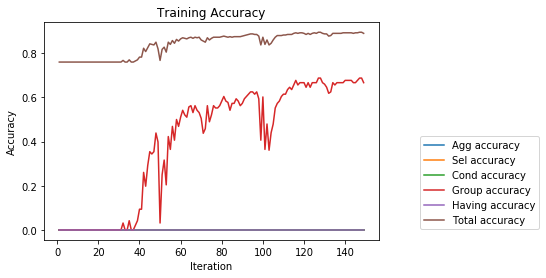

In [4]:
plt.plot(x,my_data[:-2,1], label='Agg accuracy')
plt.plot(x,my_data[:-2,2], label='Sel accuracy')
plt.plot(x,my_data[:-2,3], label='Cond accuracy')
plt.plot(x,my_data[:-2,4], label='Group accuracy')
plt.plot(x,my_data[:-2,5], label='Having accuracy')
plt.plot(x, my_data[:-2,0], label = 'Total accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend(loc=9, bbox_to_anchor=(1.3, 0.5))
#pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.show()

In [5]:
# Load the data into a np array
dev_data = np.genfromtxt('results_dev.csv', delimiter=' ', dtype=float)

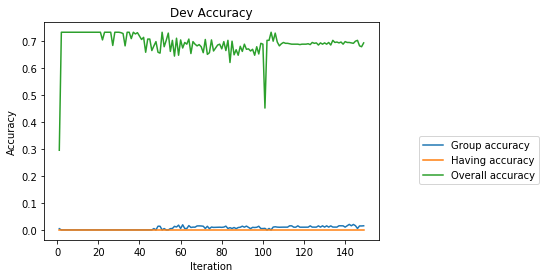

In [6]:
# plt.plot(x,dev_data[:-3,1], label='Agg accuracy')
# plt.plot(x,dev_data[:-3,2], label='Sel accuracy')
# plt.plot(x,dev_data[:-3,3], label='Cond accuracy')
plt.plot(x,dev_data[:-3,4], label='Group accuracy')
plt.plot(x,dev_data[:-3,5], label='Having accuracy')
plt.plot(x, dev_data[:-3,0], label='Overall accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Dev Accuracy')
plt.legend(loc=9, bbox_to_anchor=(1.3, 0.5))
#pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.show()

In [7]:
best_train_acc = np.nanmax(my_data, axis=0)

In [8]:
best_dev_acc = np.nanmax(dev_data,axis=0) # Overall_acc, Agg_acc, sel_acc, Cond_acc

In [9]:
print(best_train_acc)
print(best_dev_acc)

[ 0.895   0.      0.      0.      0.6875  0.    ]
[ 0.73417722  0.          0.          0.          0.02051282  0.        ]


## APPEND DATA TO BEST_RESULTS_FILE

In [10]:
import csv
import pandas

# with open('best_results_train.csv', 'wb') as csvfile:
#     spamwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
#     spamwriter.writerow(['total', 'agg', 'sel', 'cond', 'group', 'epoch_num', 'toy', 'changes_made'])
# with open('best_results_dev.csv', 'wb') as csvfile:
#     new_writer = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
#     new_writer.writerow(['total', 'agg', 'sel', 'cond', 'group', 'epoch_num', 'toy', 'changes_made'])



In [11]:
# Train_Data
to_write = np.append(np.nanmax(my_data, axis=0), [300, True])
# Get Data
to_app = {}
names = ['total', 'agg', 'sel', 'cond', 'group', 'epoch_num', 'toy', 'changes_made']
for i, item in enumerate(to_write):
    to_app[names[i]] = item
to_app['toy'] = to_app['toy'] == 1
to_app['changes_made'] = 'moving agg accuracy back to before'
# Convert to DataFrame - one row
to_add = pandas.DataFrame(columns=names)
to_add.loc[0] = to_app

# Append to CSV
with open('best_results_train.csv', 'a') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(to_add.loc[0])


In [11]:
# Dev_data
to_write = np.append(np.nanmax(dev_data, axis=0), [300, True])
# Get Data
to_app = {}
names = ['total', 'agg', 'sel', 'cond', 'group', 'epoch_num', 'toy', 'changes_made']
for i, item in enumerate(to_write):
    to_app[names[i]] = item
to_app['toy'] = to_app['toy'] == 1
to_app['changes_made'] = 'moving agg accuracy back to before'
# Convert to DataFrame - one row
to_add = pandas.DataFrame(columns=names)
to_add.loc[0] = to_app

# Append to CSV
with open('best_results_dev.csv', 'a') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(to_add.loc[0])


## See Total History of Changes

In [12]:
train_hist = np.genfromtxt('best_results_train.csv', delimiter=' ',usecols=np.arange(0,5), dtype=float)
dev_hist = np.genfromtxt('best_results_dev.csv', delimiter=' ', usecols = np.arange(0, 5), dtype=float)

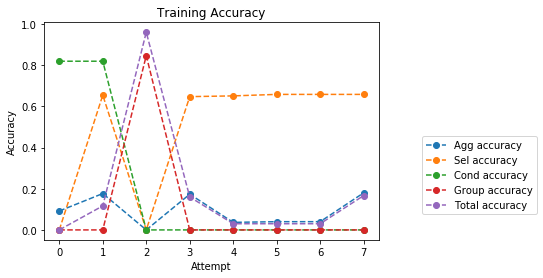

In [17]:
x = range(len(train_hist) - 1) 

plt.plot(x,train_hist[1:,1],'--o', label='Agg accuracy' )
plt.plot(x,train_hist[1:,2], '--o', label='Sel accuracy')
plt.plot(x,train_hist[1:,3], '--o',label='Cond accuracy')
plt.plot(x,train_hist[1:,4], '--o',label='Group accuracy')
plt.plot(x, train_hist[1:,0], '--o',label = 'Total accuracy')

plt.xlabel('Attempt')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend(loc=9, bbox_to_anchor=(1.3, 0.5))
#pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.show()

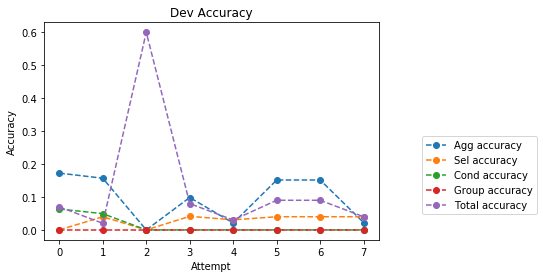

In [16]:
dev_hist[1:,2] # SELECTION ACCURACY

array([ 0.        ,  0.04      ,  0.        ,  0.04123711,  0.03061224,
        0.04      ,  0.04      ,  0.04      ])

In [17]:
dev_hist[1:,1] # AGGREGATION ACCURACY

array([ 0.17241379,  0.15686275,  0.        ,  0.09836066,  0.02083333,
        0.15151515,  0.15151515,  0.02222222])